# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
# Create a base URL and make url to fahrenheit 
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count=0


# Build query URL using openweathermap website help
for city in cities:
    response = requests.get(query_url+city)
#     print(response.url)
    response = response.json()
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])                
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        
        print(f'Processing record {count} of {len(cities)}: | {city}')
    except:
        print("City not found, skipping...")
        time.sleep(1.1)
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing record 1 of 620: | dikson
Processing record 2 of 620: | tarauaca
Processing record 3 of 620: | azare
Processing record 4 of 620: | madera
Processing record 5 of 620: | punta arenas
Processing record 6 of 620: | yerbogachen
Processing record 7 of 620: | avarua
Processing record 8 of 620: | ambovombe
Processing record 9 of 620: | kamyshlov
Processing record 10 of 620: | hilo
Processing record 11 of 620: | taree
Processing record 12 of 620: | buala
Processing record 13 of 620: | cherskiy
City not found, skipping...
Processing record 14 of 620: | yellowknife
Processing record 15 of 620: | diu
Processing record 16 of 620: | port alfred
City not found, skipping...
Processing record 17 of 620: | castro-urdiales
Processing record 18 of 620: | busselton
City not found, skipping...
Processing record 19 of 620: | luderitz
Processing record 20 of 620: | si sa ket
Processing record 21 of 620: | souillac
Processing record 22 of 620: | burley
Processing record 23 of 620: | albany
Processin

Processing record 186 of 620: | derbent
Processing record 187 of 620: | kolondieba
Processing record 188 of 620: | cabedelo
Processing record 189 of 620: | dryden
Processing record 190 of 620: | aykhal
Processing record 191 of 620: | zyryanskoye
Processing record 192 of 620: | riyadh
Processing record 193 of 620: | kungurtug
Processing record 194 of 620: | palmer
Processing record 195 of 620: | cordoba
Processing record 196 of 620: | celestun
Processing record 197 of 620: | hambantota
Processing record 198 of 620: | klaksvik
Processing record 199 of 620: | ponta do sol
Processing record 200 of 620: | russell
Processing record 201 of 620: | saint-joseph
Processing record 202 of 620: | amnat charoen
Processing record 203 of 620: | kuusamo
Processing record 204 of 620: | dundalk
Processing record 205 of 620: | kloulklubed
Processing record 206 of 620: | inta
Processing record 207 of 620: | hasaki
Processing record 208 of 620: | edd
Processing record 209 of 620: | sterling
Processing recor

Processing record 380 of 620: | cayenne
Processing record 381 of 620: | mantua
Processing record 382 of 620: | san luis
Processing record 383 of 620: | los chiles
Processing record 384 of 620: | huarmey
Processing record 385 of 620: | oranjestad
Processing record 386 of 620: | kabanjahe
Processing record 387 of 620: | jyvaskyla
Processing record 388 of 620: | blyznyuky
Processing record 389 of 620: | adeje
Processing record 390 of 620: | vostok
Processing record 391 of 620: | coolum beach
Processing record 392 of 620: | chokurdakh
Processing record 393 of 620: | byron bay
Processing record 394 of 620: | ormara
Processing record 395 of 620: | catemaco
City not found, skipping...
Processing record 396 of 620: | znamenskoye
Processing record 397 of 620: | point pedro
Processing record 398 of 620: | inuvik
Processing record 399 of 620: | ellensburg
Processing record 400 of 620: | san jose
Processing record 401 of 620: | nikolskoye
Processing record 402 of 620: | natal
Processing record 403

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Created a dictionary to make into a dataframe
weather_info = {"City": city_name,
               "Latitude": lat,
               "Longitude": long,
               "Max Temp": max_temp,
               "Humidity": humidity,
               "Cloudiness (%)": cloudiness,
               "Wind Speed (m/s)": wind_speed,
               "Country": country,
               "Date": date}

# Dataframe created and saved
weather_df = pd.DataFrame(weather_info)
weather_df.to_csv('../Output_data/Output_weather_data.csv')
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Dikson,73.51,80.55,-21.33,86,100,22.57,RU,1608243176
1,Tarauacá,-8.16,-70.77,87.57,55,47,1.77,BR,1608243176
2,Azare,11.68,10.19,69.66,23,49,7.43,NG,1608243177
3,Madera,37.17,-119.83,48.00,87,53,5.99,US,1608243177
4,Punta Arenas,-53.15,-70.92,55.40,43,0,32.21,CL,1608242972


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
# Check humidity over 100%
weather_df['Humidity']>100

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Name: Humidity, Length: 569, dtype: bool

In [43]:
#  Get the indices of cities that have humidity over 100%.
hum_data = weather_df[weather_df['Humidity']>100].index

In [45]:
# Make a new DF to drop all data thats in the original df that checks humidity.
clean_df = weather_df.drop(hum_data,inplace = False)
clean_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Dikson,73.51,80.55,-21.33,86,100,22.57,RU,1608243176
1,Tarauacá,-8.16,-70.77,87.57,55,47,1.77,BR,1608243176
2,Azare,11.68,10.19,69.66,23,49,7.43,NG,1608243177
3,Madera,37.17,-119.83,48.00,87,53,5.99,US,1608243177
4,Punta Arenas,-53.15,-70.92,55.40,43,0,32.21,CL,1608242972
...,...,...,...,...,...,...,...,...,...
564,Belaya Gora,68.53,146.42,-10.57,90,100,3.33,RU,1608243290
565,Maner,25.65,84.88,50.00,71,21,4.70,IN,1608243290
566,Poplar Bluff,36.76,-90.39,36.00,64,40,6.93,US,1608243290
567,Emerald,-23.53,148.17,80.60,78,66,8.05,AU,1608243290


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The temperature increases as you get closer to the equator


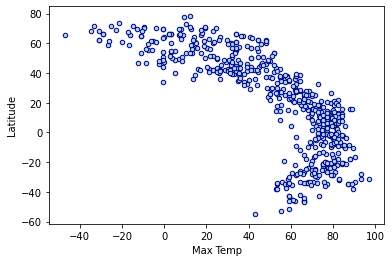

In [53]:
# Create a scatter plot to address latitude vs temperature
lat_temp = clean_df.plot.scatter(x = "Max Temp",y = "Latitude", color = "LightBlue", edgecolor='DarkBlue')
print("The temperature increases as you get closer to the equator")

## Latitude vs. Humidity Plot

Humidity increases as latitude increases.


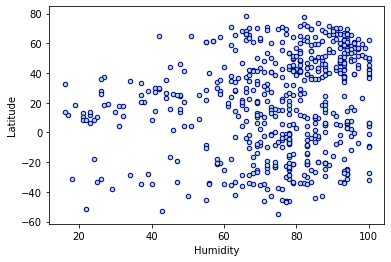

In [54]:
# Create a scatter plot to address latitude vs humidity.
lat_hum = clean_df.plot.scatter(x = "Humidity", y = "Latitude", color = "LightBlue", edgecolor='DarkBlue')
print("Humidity increases as latitude increases.")

## Latitude vs. Cloudiness Plot

Humidity tends to float around different pertantages depending on their altitude level such as 20%, 40%, and 100%.


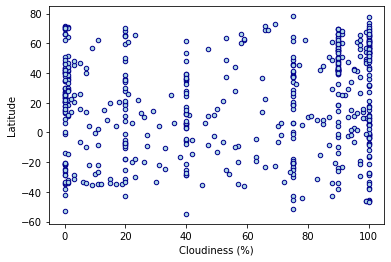

In [60]:
# Create a scatter plot to address latitude vs cloudiness.
lat_cloud = clean_df.plot.scatter(y = "Latitude", x = "Cloudiness (%)", color = "LightBlue", edgecolor='DarkBlue')
print("Humidity tends to float around different pertantages depending on their altitude level such as 20%, 40%, and 100%.")

## Latitude vs. Wind Speed Plot

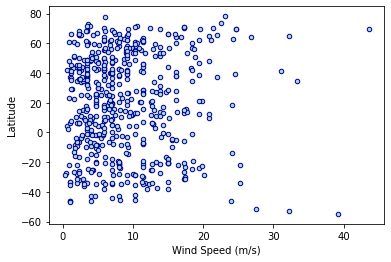

In [59]:
# Create a scatter plot to address latitude vs wind speed.
lat_wind = clean_df.plot.scatter(x = "Wind Speed (m/s)", y = "Latitude", color = "LightBlue", edgecolor='DarkBlue')
print("It is a rare occasion that wind speed goes over 30m/s. This also shows that there is no real correlation between wind speed and latitude.")

## Linear Regression

In [62]:
#Make new df for just northern hemisphere
north_df = clean_df.loc[clean_df["Latitude"]>0]
north_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
0,Dikson,73.51,80.55,-21.33,86,100,22.57,RU,1608243176
2,Azare,11.68,10.19,69.66,23,49,7.43,NG,1608243177
3,Madera,37.17,-119.83,48.00,87,53,5.99,US,1608243177
5,Yerbogachën,61.28,108.01,-5.53,90,100,6.76,RU,1608243177
8,Kamyshlov,56.84,62.71,20.16,95,100,9.91,RU,1608243177


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

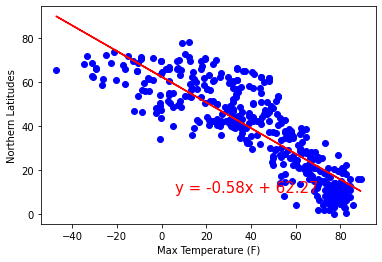

The R-Value is: -0.853984694361689
OBSERVATION: Using R-Value, you can tell that there is negative correlation between Northern Latitudes vs Max Temperature


In [95]:
#Make X and Y axises for temp and latitude
x_ntemp = north_df["Max Temp"]
y_nlat = north_df["Latitude"]

#Calculate line regression using "y=mx+b"
slope, intercept, rvalue, pvalue, stderr = linregress(x_ntemp, y_nlat)
regress_values = x_ntemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the Scatter Plot

plt.scatter(x_ntemp, y_nlat, color = 'blue')
plt.plot(x_ntemp,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Northern Latitudes")
plt.show(line_eq, rvalue)

print("The R-Value is:", rvalue)
print("OBSERVATION: Using R-Value, you can tell that there is negative correlation between Northern Latitudes vs Max Temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [74]:
south_df = clean_df.loc[clean_df["Latitude"]<0]
south_df.head()



,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness (%),Wind Speed (m/s),Country,Date
1,Tarauacá,-8.16,-70.77,87.57,55,47,1.77,BR,1608243176
4,Punta Arenas,-53.15,-70.92,55.40,43,0,32.21,CL,1608242972
6,Avarua,-21.21,-159.78,84.20,79,100,13.87,CK,1608243177
7,Ambovombe,-25.17,46.08,75.90,84,20,4.32,MG,1608243177
10,Taree,-31.90,152.47,82.99,100,1,2.24,AU,1608242947


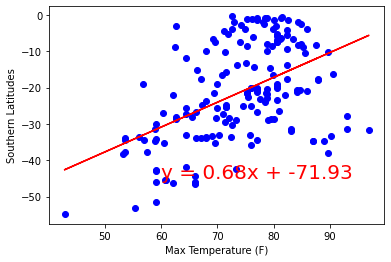

The R-Value is: 0.4878260278454015
OBSERVATION: Using R-Value, you can tell that there is slight positive correlation between Southern Latitude vs Max Temperature


In [96]:
#Make X and Y axises for temp and latitude
x_stemp = south_df["Max Temp"]
y_slat = south_df["Latitude"]

#Calculate line regression using "y=mx+b"
slope, intercept, rvalue, pvalue, stderr = linregress(x_stemp, y_slat)
regress_values = x_stemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the Scatter Plot

plt.scatter(x_stemp, y_slat, color = 'blue')
plt.plot(x_stemp,regress_values,"r-")
plt.annotate(line_eq,(60,-45),fontsize=20,color="red")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Southern Latitudes")
plt.show(line_eq, rvalue)

print("The R-Value is:", rvalue)
print("OBSERVATION: Using R-Value, you can tell that there is slight positive correlation between Southern Latitude vs Max Temperature")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

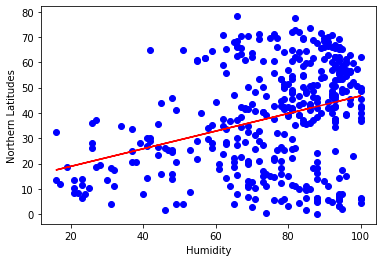

The R-Value is: 0.33466644480656227
OBSERVATION: Using R-Value, you can tell that there is slight positive correlation between Northern Hemisphere vs Humidity (%)


In [97]:
#Make X and Y axises for temp and latitude
x_nhum = north_df["Humidity"]
y_nlat = north_df["Latitude"]

#Calculate line regression using "y=mx+b"
slope, intercept, rvalue, pvalue, stderr = linregress(x_nhum, y_nlat)
regress_values = x_nhum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the Scatter Plot

plt.scatter(x_nhum, y_nlat, color = 'blue')
plt.plot(x_nhum,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Humidity")
plt.ylabel("Northern Latitudes")
plt.show(line_eq, rvalue)

print("The R-Value is:", rvalue)
print("OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Northern Hemisphere vs Humidity (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

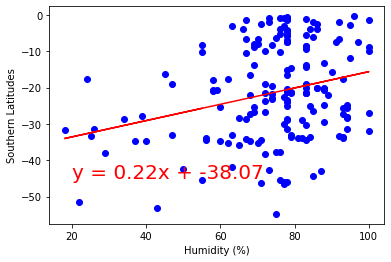

The R-Value is: 0.2695747036265495
OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Southern Hemisphere vs Humidity (%)


In [102]:
#Make X and Y axises for temp and latitude
x_stemp = south_df["Humidity"]
y_slat = south_df["Latitude"]

#Calculate line regression using "y=mx+b"
slope, intercept, rvalue, pvalue, stderr = linregress(x_stemp, y_slat)
regress_values = x_stemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the Scatter Plot

plt.scatter(x_stemp, y_slat, color = 'blue')
plt.plot(x_stemp,regress_values,"r-")
plt.annotate(line_eq,(20,-45),fontsize=20,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel("Southern Latitudes")
plt.show(line_eq, rvalue)

print("The R-Value is:", rvalue)
print("OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Southern Hemisphere vs Humidity (%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

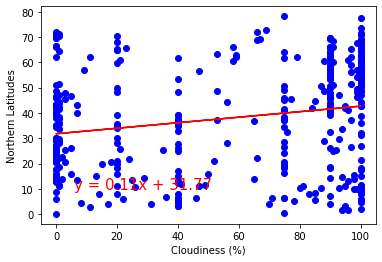

The R-Value is: 0.2103412792269778
OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Northern Hemisphere vs Cloudiness (%)


In [109]:
#Make X and Y axises for temp and latitude
x_ncloud = north_df["Cloudiness (%)"]
y_nlat = north_df["Latitude"]

#Calculate line regression using "y=mx+b"
slope, intercept, rvalue, pvalue, stderr = linregress(x_ncloud, y_nlat)
regress_values = x_ncloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the Scatter Plot

plt.scatter(x_ncloud, y_nlat, color = 'blue')
plt.plot(x_ncloud,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Northern Latitudes")
plt.show(line_eq, rvalue)

print("The R-Value is:", rvalue)
print("OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Northern Hemisphere vs Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

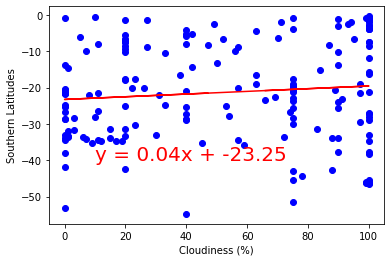

The R-Value is: 0.10211495459826746
OBSERVATION: Using R-Value, you can tell that there is no correlation between Southern Hemisphere vs Humidity (%)


In [110]:
#Make X and Y axises for temp and latitude
x_scloud = south_df["Cloudiness (%)"]
y_slat = south_df["Latitude"]

#Calculate line regression using "y=mx+b"
slope, intercept, rvalue, pvalue, stderr = linregress(x_scloud, y_slat)
regress_values = x_scloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the Scatter Plot

plt.scatter(x_scloud, y_slat, color = 'blue')
plt.plot(x_scloud,regress_values,"r-")
plt.annotate(line_eq,(10,-40),fontsize=20,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Southern Latitudes")
plt.show(line_eq, rvalue)

print("The R-Value is:", rvalue)
print("OBSERVATION: Using R-Value, you can tell that there is no correlation between Southern Hemisphere vs Humidity (%)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

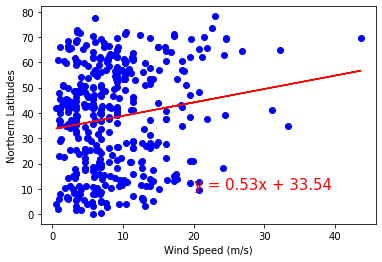

The R-Value is: 0.15756733314063984
OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Northern Hemisphere vs Wind Speed (mph)


In [114]:
#Make X and Y axises for temp and latitude
x_nwind = north_df["Wind Speed (m/s)"]
y_nlat = north_df["Latitude"]

#Calculate line regression using "y=mx+b"
slope, intercept, rvalue, pvalue, stderr = linregress(x_nwind, y_nlat)
regress_values = x_nwind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the Scatter Plot

plt.scatter(x_nwind, y_nlat, color = 'blue')
plt.plot(x_nwind,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Northern Latitudes")
plt.show(line_eq, rvalue)

print("The R-Value is:", rvalue)
print("OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Northern Hemisphere vs Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

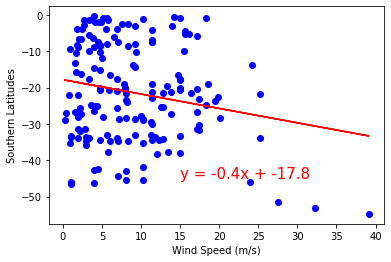

The R-Value is: -0.19363269768019822
OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Southern Hemisphere vs Wind Speed (mph)


In [117]:
#Make X and Y axises for temp and latitude
x_swind = south_df["Wind Speed (m/s)"]
y_slat = south_df["Latitude"]

#Calculate line regression using "y=mx+b"
slope, intercept, rvalue, pvalue, stderr = linregress(x_swind, y_slat)
regress_values = x_swind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the Scatter Plot

plt.scatter(x_swind, y_slat, color = 'blue')
plt.plot(x_swind,regress_values,"r-")
plt.annotate(line_eq,(15,-45),fontsize=15,color="red")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Southern Latitudes")
plt.show(line_eq, rvalue)

print("The R-Value is:", rvalue)
print("OBSERVATION: Using R-Value, you can tell that there is almost no correlation between Southern Hemisphere vs Wind Speed (mph)")